In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dateparser
import warnings
warnings.filterwarnings('ignore')

# DEFINE PROBLEM

- Dataset is taken from historical sales transaction in India E-commerce (April 2018 - March 2019)
- Dataset Consist of 3 File CSV (List of Orders, Orders Details, Sales target)
- Some product didn't achieve sales target

# DEFINE GOALS

- Develop strategy to increase Sales trough transaction data analysis

### IMPORT FILE

In [2]:
### Import CSV 1 (List of Orders)
df_list_orders = pd.read_csv('List of Orders.csv')
df_list_orders.head()
## Used For Monthly & Daily Transaction

,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,03-04-2018,Divsha,Rajasthan,Jaipur
4,B-25605,05-04-2018,Kasheen,West Bengal,Kolkata


In [3]:
### Checking Missing Value List of Orders
df_list_orders.isna().sum()

Order ID        60
Order Date      60
CustomerName    60
State           60
City            60
dtype: int64

In [4]:
df_list_orders.tail(60)

,Order ID,Order Date,CustomerName,State,City
500,NaN,NaN,NaN,NaN,NaN
501,NaN,NaN,NaN,NaN,NaN
502,NaN,NaN,NaN,NaN,NaN
503,NaN,NaN,NaN,NaN,NaN
504,NaN,NaN,NaN,NaN,NaN
505,NaN,NaN,NaN,NaN,NaN
506,NaN,NaN,NaN,NaN,NaN
507,NaN,NaN,NaN,NaN,NaN
508,NaN,NaN,NaN,NaN,NaN
509,NaN,NaN,NaN,NaN,NaN


In [5]:
### All Empty data on List of Orders Data set are in the bottom of the table and have no impact to overall data

In [6]:
### Import CSV 2 (Orders Details)
df_orders_details = pd.read_csv('Order Details.csv')
df_orders_details.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones


In [7]:
df_orders_details.isna().sum()

Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
dtype: int64

In [8]:
## Combine Dataset
df = pd.merge(df_list_orders, df_orders_details, on = ['Order ID'])
## Utilize for multivariate analysis

### DATA TYPE OVERALL CHECK

In [9]:
df.head()

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole
2,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,01-04-2018,Pearl,Maharashtra,Pune,168.0,-111.0,2,Electronics,Phones


In [10]:
print(df.shape)

(1500, 10)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      1500 non-null   object 
 1   Order Date    1500 non-null   object 
 2   CustomerName  1500 non-null   object 
 3   State         1500 non-null   object 
 4   City          1500 non-null   object 
 5   Amount        1500 non-null   float64
 6   Profit        1500 non-null   float64
 7   Quantity      1500 non-null   int64  
 8   Category      1500 non-null   object 
 9   Sub-Category  1500 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 128.9+ KB


In [12]:
## df.head(), df.shape, df.info() is utilized to capture dataset genereal information

# DESCRIPTIVE ANALYSIS, HANDLING OUTLIERS, AND HANDLING MISSING VALUE

### DESCRIPTIVE ANALYSIS

In [13]:
df.describe(include = 'O')
## To get general information of Categorical Statistic
## From this table We know, top transaction is occured in Madhya Pradesh State and Indore City
## Top Sales Product Category is Clothing 
## Top Sales Sub-Category Prodcuct is Saree (India Female Dress)
## There are 500 unique Order_ID but only 332 Unique Customer Name ==> Customers have more than one transaction
## Top transaction occured on 10 March 2019
## ==> We will do deeper analysis in Univariate & Multivariate Analysis

,Order ID,Order Date,CustomerName,State,City,Category,Sub-Category
count,1500,1500,1500,1500,1500,1500,1500
unique,500,307,332,19,24,3,17
top,B-26056,10-03-2019,Abhishek,Madhya Pradesh,Indore,Clothing,Saree
freq,12,33,25,340,267,949,210


In [14]:
df['State'].unique()
# Get unique range of India State in Ecommerce Sales

array(['Gujarat', 'Maharashtra', 'Madhya Pradesh', 'Rajasthan',
       'West Bengal', 'Karnataka', 'Jammu and Kashmir', 'Tamil Nadu',
       'Uttar Pradesh', 'Bihar', 'Kerala ', 'Punjab', 'Haryana',
       'Himachal Pradesh', 'Sikkim', 'Goa', 'Nagaland', 'Andhra Pradesh',
       'Delhi'], dtype=object)

In [15]:
df['City'].unique()
# Get unique range of India City in Ecommerce Sales

array(['Ahmedabad', 'Pune', 'Bhopal', 'Jaipur', 'Kolkata', 'Bangalore',
       'Kashmir', 'Chennai', 'Lucknow', 'Patna', 'Thiruvananthapuram',
       'Chandigarh', 'Simla', 'Gangtok', 'Goa', 'Kohima', 'Hyderabad',
       'Mumbai', 'Indore', 'Surat', 'Udaipur', 'Allahabad', 'Amritsar',
       'Delhi'], dtype=object)

In [16]:
df['Category'].unique()
## To get Category Product which is sold in Ecommerce

array(['Furniture', 'Clothing', 'Electronics'], dtype=object)

In [17]:
df['Sub-Category'].unique()
## To get Sub-Category Product which is sold in Ecommerce

array(['Bookcases', 'Stole', 'Hankerchief', 'Electronic Games', 'Phones',
       'Saree', 'Trousers', 'Chairs', 'Kurti', 'T-shirt', 'Shirt',
       'Leggings', 'Tables', 'Printers', 'Accessories', 'Furnishings',
       'Skirt'], dtype=object)

In [18]:
Furniture = list(df[(df['Category']=='Furniture')]['Sub-Category'].unique())
Furniture
## To get list of Sub-Category Product in Furniture Category

['Bookcases', 'Chairs', 'Tables', 'Furnishings']

In [19]:
Clothing = list(df[(df['Category']=='Clothing')]['Sub-Category'].unique())
Clothing
## To get list of Sub-Category Product in Clothing Category

['Stole',
 'Hankerchief',
 'Saree',
 'Trousers',
 'Kurti',
 'T-shirt',
 'Shirt',
 'Leggings',
 'Skirt']

In [20]:
Electronics = list(df[(df['Category']=='Electronics')]['Sub-Category'].unique())
Electronics
## To get list of Sub-Category Product in Clothing Category

['Electronic Games', 'Phones', 'Printers', 'Accessories']

In [21]:
round(df.describe(),2)
## To get general information of numerical columns
## Range amount sold in Ecommerce is between 4 and 5729 Indian Rupee with average 287.67 Indian Rupee
## Range profit obtained is between -1981 Indian Rupee and 1698 Indian Rupee with average of 15.97 Indian Rupee ==> Still burning money for promotion
## Top quantity customers buy in one transaction is 14, where the average is 3.74

,Amount,Profit,Quantity
count,1500.00,1500.00,1500.00
mean,287.67,15.97,3.74
std,461.05,169.14,2.18
min,4.00,-1981.00,1.00
25%,45.00,-9.25,2.00
50%,118.00,9.00,3.00
75%,322.00,38.00,5.00
max,5729.00,1698.00,14.00


In [22]:
round(df.corr(),2)
## Profit has not correlation with Quantity

,Amount,Profit,Quantity
Amount,1.00,0.24,0.35
Profit,0.24,1.00,0.00
Quantity,0.35,0.00,1.00


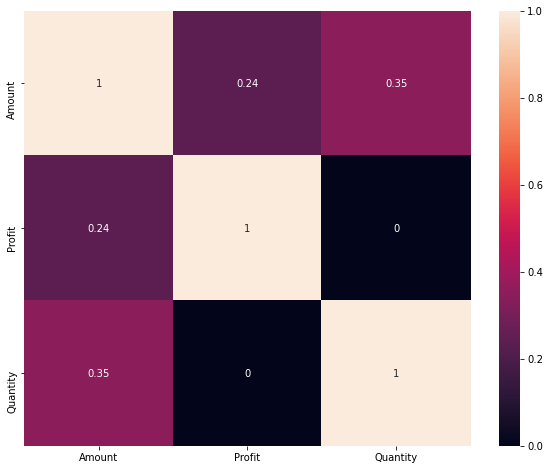

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(round(df.corr(),2), annot=True)
plt.show()

### MISSING VALUE CHECK & HANDLING

In [24]:
df.isna().sum()
## From information below, dataset has no missing value. So, we don't need to drop or fill any value into dataset.

Order ID        0
Order Date      0
CustomerName    0
State           0
City            0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
dtype: int64

### OUTLIERS CHECK & HANDLING

In [25]:
outliers = []
def cek_outlier(data):
    sorted(data)
    q1, q3 = np.percentile(data, [25,75])
    iqr = q3-q1
    lower_fence = q1 - (1.5 * iqr)
    upper_fence = q3 + (1.5 * iqr)
    for i in data:
        if i < lower_fence or i > upper_fence:
            outliers.append(i)
    return outliers

##### OUTLIERS AMOUNT

In [26]:
outliers = []
cek_outlier(df['Amount'])
## Check Outliers Value in Amount Column

[1275.0,
 2617.0,
 1355.0,
 1364.0,
 856.0,
 1076.0,
 781.0,
 1603.0,
 1103.0,
 1560.0,
 880.0,
 816.0,
 1629.0,
 1061.0,
 925.0,
 823.0,
 1279.0,
 1327.0,
 1389.0,
 1021.0,
 785.0,
 934.0,
 1030.0,
 832.0,
 929.0,
 1263.0,
 1625.0,
 1096.0,
 1829.0,
 887.0,
 1300.0,
 941.0,
 1055.0,
 771.0,
 1549.0,
 1145.0,
 1069.0,
 877.0,
 1052.0,
 1361.0,
 761.0,
 1709.0,
 3151.0,
 2188.0,
 1316.0,
 765.0,
 1582.0,
 1183.0,
 1076.0,
 1506.0,
 933.0,
 1361.0,
 767.0,
 1854.0,
 1402.0,
 976.0,
 1630.0,
 2830.0,
 757.0,
 765.0,
 1120.0,
 911.0,
 743.0,
 2103.0,
 911.0,
 1063.0,
 1954.0,
 1298.0,
 955.0,
 1250.0,
 1543.0,
 757.0,
 916.0,
 869.0,
 2093.0,
 829.0,
 1027.0,
 1319.0,
 2457.0,
 2061.0,
 1118.0,
 845.0,
 1275.0,
 1137.0,
 741.0,
 1351.0,
 2244.0,
 2115.0,
 2125.0,
 1246.0,
 915.0,
 857.0,
 846.0,
 802.0,
 1700.0,
 871.0,
 1622.0,
 850.0,
 1622.0,
 1599.0,
 977.0,
 3873.0,
 1228.0,
 1308.0,
 1657.0,
 1101.0,
 1547.0,
 765.0,
 1622.0,
 742.0,
 935.0,
 744.0,
 1218.0,
 891.0,
 1716.0,
 954.0,


In [27]:
len(outliers)
# Check Number Of Outliers Value in Amount Column

155

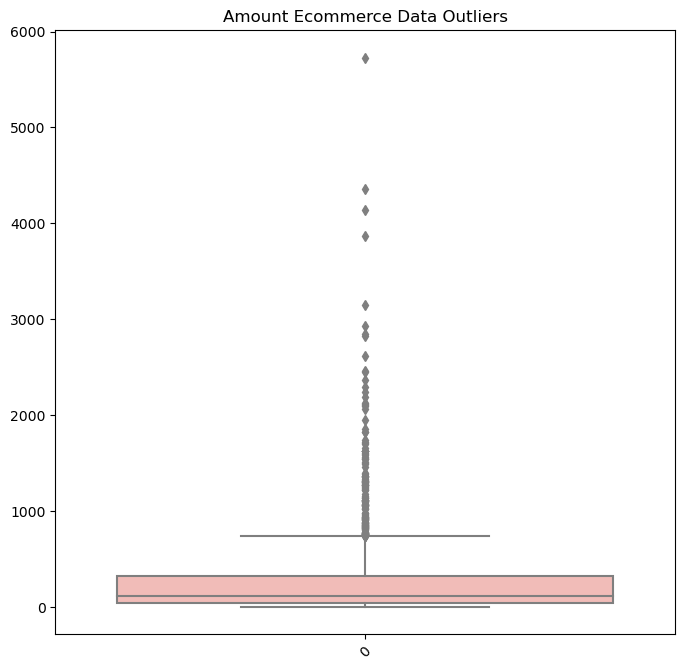

In [28]:
plt.figure(figsize=(8,8),dpi=100)
sns.boxplot(data=df['Amount'], palette='Pastel1')
plt.title("Amount Ecommerce Data Outliers")
plt.xticks(rotation=45)
plt.show()
## Show Distribution Figure and Outliers in Amount Column

In [29]:
df_outammt = df[df['Amount'].isin(outliers)]
df_outammt
## Show Outliers Amount Data

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases
6,B-25602,01-04-2018,Pearl,Maharashtra,Pune,2617.0,1151.0,4,Electronics,Phones
9,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal,1355.0,-60.0,5,Clothing,Trousers
22,B-25608,08-04-2018,Aarushi,Tamil Nadu,Chennai,1364.0,-1864.0,5,Furniture,Tables
25,B-25608,08-04-2018,Aarushi,Tamil Nadu,Chennai,856.0,385.0,6,Electronics,Printers
...,...,...,...,...,...,...,...,...,...,...
1466,B-26093,27-03-2019,Sarita,Maharashtra,Pune,2847.0,712.0,8,Electronics,Printers
1467,B-26093,27-03-2019,Sarita,Maharashtra,Pune,852.0,51.0,5,Furniture,Bookcases
1495,B-26099,30-03-2019,Bhishm,Maharashtra,Mumbai,835.0,267.0,5,Electronics,Phones
1496,B-26099,30-03-2019,Bhishm,Maharashtra,Mumbai,2366.0,552.0,5,Clothing,Trousers


In [30]:
df_outammt.pivot_table(index='Category', values='Quantity', aggfunc='sum').sort_values('Quantity', ascending=False).reset_index()
# Show category which have outstanding amount of transaction 

,Category,Quantity
0,Electronics,408
1,Furniture,268
2,Clothing,153


In [31]:
df_outammt.pivot_table(index='Sub-Category', values='Quantity', aggfunc='count').sort_values('Quantity', ascending=False).reset_index()

,Sub-Category,Quantity
0,Printers,31
1,Bookcases,25
2,Phones,20
3,Electronic Games,16
4,Trousers,15
5,Saree,13
6,Tables,13
7,Chairs,11
8,Accessories,9
9,Furnishings,2


- Electronic category (Printers Sub-Category) is the most outstanding amount of transaction

##### OUTLIERS PROFIT

In [32]:
outliers = []
cek_outlier(df['Profit'])
## Check Outliers Value in Profit Column

[-1148.0,
 -111.0,
 -272.0,
 1151.0,
 212.0,
 -166.0,
 -1864.0,
 385.0,
 -594.0,
 -270.0,
 127.0,
 -87.0,
 -349.0,
 -276.0,
 421.0,
 -129.0,
 -89.0,
 -130.0,
 -83.0,
 113.0,
 -96.0,
 -153.0,
 -239.0,
 -92.0,
 -87.0,
 -105.0,
 -225.0,
 -447.0,
 111.0,
 -103.0,
 -206.0,
 -640.0,
 318.0,
 -117.0,
 -86.0,
 -90.0,
 -312.0,
 126.0,
 680.0,
 169.0,
 -180.0,
 -81.0,
 -104.0,
 138.0,
 -200.0,
 -113.0,
 -916.0,
 206.0,
 -124.0,
 -93.0,
 -103.0,
 -187.0,
 204.0,
 -658.0,
 137.0,
 -503.0,
 139.0,
 -213.0,
 -345.0,
 -459.0,
 -316.0,
 -275.0,
 -193.0,
 -83.0,
 -153.0,
 -392.0,
 -203.0,
 -147.0,
 -190.0,
 -141.0,
 -100.0,
 -275.0,
 137.0,
 212.0,
 115.0,
 -128.0,
 114.0,
 264.0,
 -424.0,
 -113.0,
 -439.0,
 -706.0,
 -81.0,
 -154.0,
 -91.0,
 -124.0,
 -254.0,
 -225.0,
 395.0,
 -82.0,
 -146.0,
 197.0,
 266.0,
 -235.0,
 -114.0,
 -85.0,
 -312.0,
 -215.0,
 -315.0,
 213.0,
 564.0,
 -276.0,
 -492.0,
 -193.0,
 1050.0,
 -90.0,
 -527.0,
 -153.0,
 -443.0,
 180.0,
 113.0,
 -280.0,
 -143.0,
 -266.0,
 166.0,
 -447.0

In [33]:
len(outliers)
# Check Number Of Outliers Value in Profit Column

291

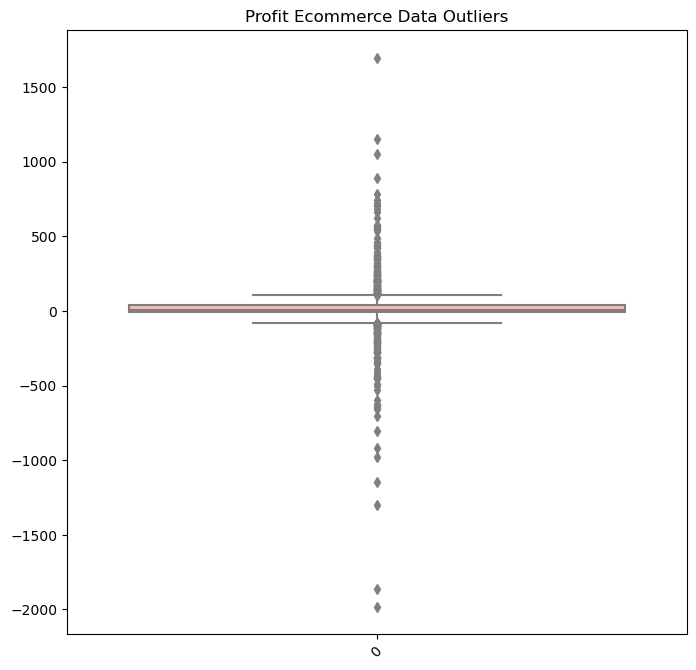

In [34]:
plt.figure(figsize=(8,8),dpi=100)
sns.boxplot(data=df['Profit'], palette='Pastel1' )
plt.title("Profit Ecommerce Data Outliers")
plt.xticks(rotation=45)
plt.show()
## Show Distribution Figure and Outliers in Profit Column

In [35]:
df_outprofit = df[df['Profit'].isin(outliers)]
df_outprofit

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases
4,B-25602,01-04-2018,Pearl,Maharashtra,Pune,168.0,-111.0,2,Electronics,Phones
5,B-25602,01-04-2018,Pearl,Maharashtra,Pune,424.0,-272.0,5,Electronics,Phones
6,B-25602,01-04-2018,Pearl,Maharashtra,Pune,2617.0,1151.0,4,Electronics,Phones
7,B-25602,01-04-2018,Pearl,Maharashtra,Pune,561.0,212.0,3,Clothing,Saree
...,...,...,...,...,...,...,...,...,...,...
1486,B-26097,28-03-2019,Vini,Karnataka,Bangalore,671.0,-309.0,5,Electronics,Electronic Games
1488,B-26098,29-03-2019,Pinky,Jammu and Kashmir,Kashmir,497.0,179.0,3,Furniture,Chairs
1495,B-26099,30-03-2019,Bhishm,Maharashtra,Mumbai,835.0,267.0,5,Electronics,Phones
1496,B-26099,30-03-2019,Bhishm,Maharashtra,Mumbai,2366.0,552.0,5,Clothing,Trousers


In [36]:
df_outprofit.pivot_table(index='Category', values='Quantity', aggfunc='count').sort_values('Quantity', ascending=False).reset_index()
# df_productlineqty.rename(columns = {'Quantity':'Sales'}, inplace=True)

,Category,Quantity
0,Electronics,118
1,Furniture,95
2,Clothing,78


In [37]:
df_outprofit_min = df_outprofit[(df_outprofit['Profit'] < 0)]
df_outprofit_min

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases
4,B-25602,01-04-2018,Pearl,Maharashtra,Pune,168.0,-111.0,2,Electronics,Phones
5,B-25602,01-04-2018,Pearl,Maharashtra,Pune,424.0,-272.0,5,Electronics,Phones
11,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal,193.0,-166.0,3,Clothing,Saree
22,B-25608,08-04-2018,Aarushi,Tamil Nadu,Chennai,1364.0,-1864.0,5,Furniture,Tables
...,...,...,...,...,...,...,...,...,...,...
1373,B-26056,10-03-2019,Sonal,Bihar,Patna,213.0,-145.0,3,Furniture,Bookcases
1431,B-26081,22-03-2019,Aarushi,Tamil Nadu,Chennai,359.0,-338.0,5,Furniture,Bookcases
1432,B-26081,22-03-2019,Aarushi,Tamil Nadu,Chennai,93.0,-84.0,3,Clothing,Saree
1485,B-26097,28-03-2019,Vini,Karnataka,Bangalore,663.0,-212.0,5,Electronics,Printers


In [38]:
df_outprofit_min.pivot_table(index='Category', values='Quantity', aggfunc='count').sort_values('Quantity', ascending=False).reset_index()

,Category,Quantity
0,Electronics,45
1,Furniture,42
2,Clothing,36


In [39]:
df_outprofit_pot = df_outprofit[(df_outprofit['Profit'] > 0)]
df_outprofit_pot

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category
6,B-25602,01-04-2018,Pearl,Maharashtra,Pune,2617.0,1151.0,4,Electronics,Phones
7,B-25602,01-04-2018,Pearl,Maharashtra,Pune,561.0,212.0,3,Clothing,Saree
25,B-25608,08-04-2018,Aarushi,Tamil Nadu,Chennai,856.0,385.0,6,Electronics,Printers
45,B-25618,18-04-2018,Manju,Andhra Pradesh,Hyderabad,362.0,127.0,1,Furniture,Bookcases
67,B-25629,24-04-2018,Hemant,Kerala,Thiruvananthapuram,1560.0,421.0,3,Clothing,Trousers
...,...,...,...,...,...,...,...,...,...,...
1468,B-26093,27-03-2019,Sarita,Maharashtra,Pune,492.0,187.0,2,Electronics,Accessories
1488,B-26098,29-03-2019,Pinky,Jammu and Kashmir,Kashmir,497.0,179.0,3,Furniture,Chairs
1495,B-26099,30-03-2019,Bhishm,Maharashtra,Mumbai,835.0,267.0,5,Electronics,Phones
1496,B-26099,30-03-2019,Bhishm,Maharashtra,Mumbai,2366.0,552.0,5,Clothing,Trousers


In [40]:
df_outprofit_pot.pivot_table(index='Category', values='Quantity', aggfunc='count').sort_values('Quantity', ascending=False).reset_index()

,Category,Quantity
0,Electronics,73
1,Furniture,53
2,Clothing,42


- India E-commerce profit still low 
- But there are outstanding profit both in positive and negative 
- Both outstanding profit are dominated by Electronics category 
- Promotion (result in negative profit) which was given to customers impacted to boost electronics sales and resulting outstanding positive profit

##### OUTLIERS QUANTITY

In [41]:
outliers = []
cek_outlier(df['Quantity'])
## Check Outliers Value in Quantity Column

[13,
 11,
 11,
 11,
 11,
 12,
 12,
 11,
 13,
 11,
 10,
 11,
 11,
 10,
 11,
 12,
 13,
 13,
 10,
 11,
 10,
 14,
 14]

In [42]:
len(outliers)
# Check Number Of Outliers Value in Quantity Column

23

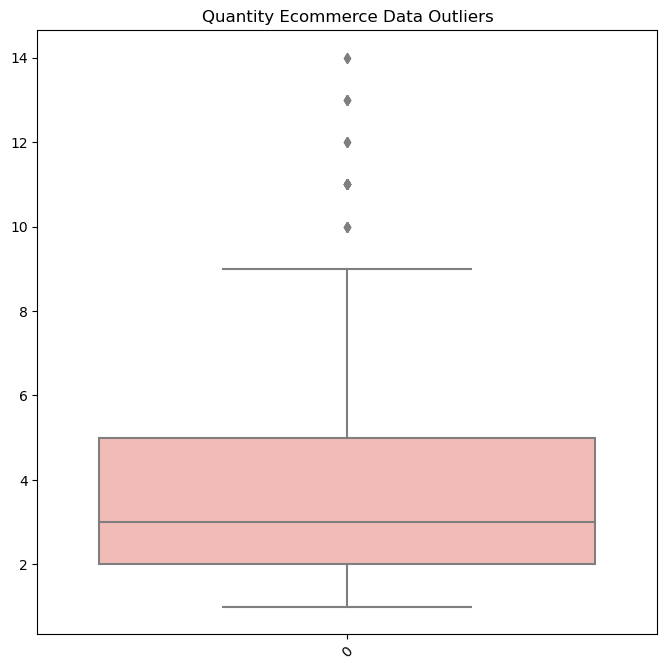

In [43]:
plt.figure(figsize=(8,8),dpi=100)
sns.boxplot(data=df['Quantity'], palette='Pastel1' )
plt.title("Quantity Ecommerce Data Outliers")
plt.xticks(rotation=45)
plt.show()
## Show Distribution Figure and Outliers in Amount Column

In [44]:
df_outqty = df[df['Quantity'].isin(outliers)]
df_outqty

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category
91,B-25640,27-04-2018,Paridhi,Rajasthan,Jaipur,314.0,-239.0,13,Clothing,Hankerchief
94,B-25642,28-04-2018,Ajay,Karnataka,Bangalore,434.0,26.0,11,Clothing,Shirt
191,B-25662,17-05-2018,Sweta,Maharashtra,Mumbai,385.0,-77.0,11,Furniture,Furnishings
237,B-25682,07-06-2018,Krutika,Bihar,Patna,545.0,-73.0,11,Electronics,Phones
402,B-25745,09-08-2018,Kartik,Gujarat,Ahmedabad,296.0,-225.0,11,Clothing,Saree
413,B-25750,14-08-2018,Priyanshu,Madhya Pradesh,Indore,42.0,-15.0,12,Clothing,Skirt
508,B-25770,02-09-2018,Sakshi,Madhya Pradesh,Indore,287.0,-280.0,12,Furniture,Chairs
571,B-25793,24-09-2018,Siddharth,Madhya Pradesh,Indore,1402.0,109.0,11,Clothing,Saree
589,B-25798,01-10-2018,Shishu,Andhra Pradesh,Hyderabad,2830.0,-1981.0,13,Furniture,Bookcases
605,B-25802,05-10-2018,Yash,Maharashtra,Mumbai,633.0,-633.0,11,Electronics,Accessories


In [45]:
df_outqty.pivot_table(index=['Category'], values='Quantity', aggfunc='count').sort_values('Quantity', ascending=False).reset_index()
# df_productlineqty.rename(columns = {'Quantity':'Sales'}, inplace=True)

,Category,Quantity
0,Clothing,11
1,Electronics,6
2,Furniture,6


- Some customers buy clothing category product in outstanding quantity 

### DATE AND TIME HANDLING

##### MERGE TABLES

In [46]:
df.dtypes
## Knowing current type data of Date & Time ==> Still in object type

Order ID         object
Order Date       object
CustomerName     object
State            object
City             object
Amount          float64
Profit          float64
Quantity          int64
Category         object
Sub-Category     object
dtype: object

In [47]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y')
## Change Date Tipe Type Data Into datetime64

In [48]:
df.dtypes
## Date & Time Data have been changed

Order ID                object
Order Date      datetime64[ns]
CustomerName            object
State                   object
City                    object
Amount                 float64
Profit                 float64
Quantity                 int64
Category                object
Sub-Category            object
dtype: object

In [49]:
purchase_date = df['Order Date'].dt

In [50]:
df['Month'] = purchase_date.month
df['Day'] = purchase_date.day
df['Day Name'] = purchase_date.day_name()
df['YearMonth'] = purchase_date.to_period('M')
df['YearMonth'] = df['YearMonth'].astype(str)
## Make Month & Day Name Column for further analysis

In [51]:
hari = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day Name'] = pd.Categorical(df['Day Name'], categories=hari, ordered=True)

##### TABLE ORDER LIST
- Utilize for univariate analysis

In [52]:
df_list_orders = df_list_orders.dropna()
## To Drop NULL Value In df_list_orders

In [53]:
df_list_orders['Order Date'] = pd.to_datetime(df_list_orders['Order Date'], format='%d-%m-%Y')
## Change Date Tipe Type Data Into datetime64

In [54]:
purchase_date2 = df_list_orders['Order Date'].dt
df_list_orders['Month'] = purchase_date2.month
df_list_orders['Day'] = purchase_date2.day
df_list_orders['Day Name'] = purchase_date2.day_name()
df_list_orders['YearMonth'] = purchase_date2.to_period('M')
df_list_orders['YearMonth'] = df_list_orders['YearMonth'].astype(str)
df_list_orders['Day Name'] = pd.Categorical(df_list_orders['Day Name'], categories=hari, ordered=True)
## Create Month Period & Day Period

# EXPLORATORY DATA ANALYSIS & DATA VISUALIZATION

In [55]:
df.head()
## See Current Table

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category,Month,Day,Day Name,YearMonth
0,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases,4,1,Sunday,2018-04
1,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole,4,1,Sunday,2018-04
2,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3,Clothing,Hankerchief,4,1,Sunday,2018-04
3,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4,Electronics,Electronic Games,4,1,Sunday,2018-04
4,B-25602,2018-04-01,Pearl,Maharashtra,Pune,168.0,-111.0,2,Electronics,Phones,4,1,Sunday,2018-04


In [56]:
df_list_orders.head()

,Order ID,Order Date,CustomerName,State,City,Month,Day,Day Name,YearMonth
0,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,4,1,Sunday,2018-04
1,B-25602,2018-04-01,Pearl,Maharashtra,Pune,4,1,Sunday,2018-04
2,B-25603,2018-04-03,Jahan,Madhya Pradesh,Bhopal,4,3,Tuesday,2018-04
3,B-25604,2018-04-03,Divsha,Rajasthan,Jaipur,4,3,Tuesday,2018-04
4,B-25605,2018-04-05,Kasheen,West Bengal,Kolkata,4,5,Thursday,2018-04


### UNIVARIATE ANALYSIS

In [57]:
df_month = df_list_orders.pivot_table(index='YearMonth', values='State', aggfunc='count').reset_index()
df_month.rename(columns = {'State':'Sales'}, inplace=True)
df_month
## Get sales data by Month (Count of Transaction)

,YearMonth,Sales
0,2018-04,44
1,2018-05,31
2,2018-06,30
3,2018-07,31
4,2018-08,31
5,2018-09,30
6,2018-10,43
7,2018-11,46
8,2018-12,41
9,2019-01,61


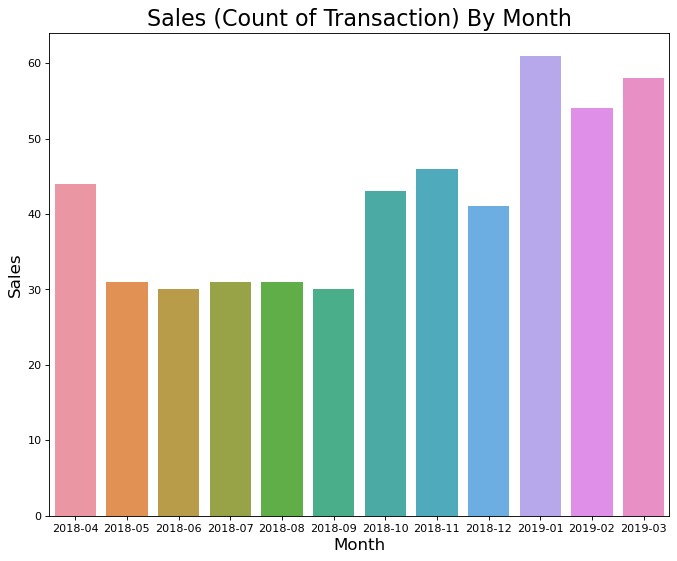

In [58]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df_list_orders['YearMonth'])
plt.title('Sales (Count of Transaction) By Month', size =20)
plt.xlabel("Month",size = 15)
plt.ylabel("Sales", size = 15)
plt.show()
## Show graphic sales by Month

In [59]:
df_month = df.pivot_table(index='YearMonth', values='Profit', aggfunc='sum').reset_index()
df_month.rename(columns = {'Quantity':'Sales'}, inplace=True)
df_month
## Get sales profit by Month

,YearMonth,Profit
0,2018-04,-3960.0
1,2018-05,-3584.0
2,2018-06,-4970.0
3,2018-07,-2138.0
4,2018-08,-2180.0
5,2018-09,-4963.0
6,2018-10,3093.0
7,2018-11,11619.0
8,2018-12,5284.0
9,2019-01,9760.0


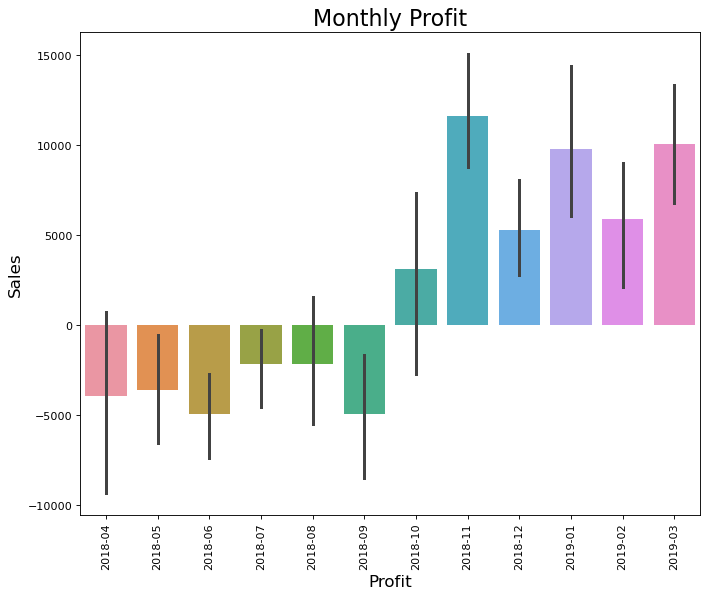

In [60]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x='YearMonth', y='Profit', data = df, estimator=sum)
plt.title('Monthly Profit', size =20)
plt.xlabel("Profit",size = 15)
plt.ylabel("Sales", size = 15)
plt.xticks(rotation=90)
plt.show()

#### Sales By Month
- Sales Transaction quite steady between May - Sept 2018 and start to increasing after Sept 2018
- Peak sales transaction is occurred on January 2019
- Negative profits occurred during first 6 months (Apr-Sept 2018) --> Assumption still burning money big discount for promotion
- Profits start turn into positve by October 2018 onward

In [61]:
df_dayname = df_list_orders.pivot_table(index='Day Name', values='State', aggfunc='count').reset_index()
df_dayname.rename(columns = {'Total':'Transaction'}, inplace=True)
df_dayname
## Get Daily sales data

,Day Name,State
0,Monday,81
1,Tuesday,64
2,Wednesday,55
3,Thursday,74
4,Friday,78
5,Saturday,71
6,Sunday,77


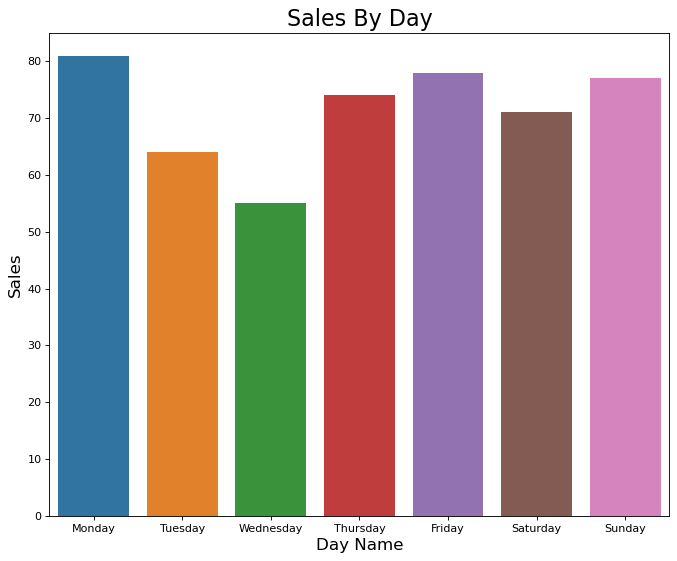

In [62]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df_list_orders['Day Name'])
plt.title('Sales By Day', size =20)
plt.xlabel("Day Name",size = 15)
plt.ylabel("Sales", size = 15)
plt.show()
## Show graphic sales by Month

#### Daily Sales Transaction
- Most transaction occurred on Monday 
- Least transaction occurred on Wednesday

In [63]:
df_day = df_list_orders.pivot_table(index='Day', values='State', aggfunc='count').reset_index()
df_day.rename(columns = {'State':'Sales'}, inplace=True)
df_day
## Get sales by date 

,Day,Sales
0,1,20
1,2,11
2,3,21
3,4,23
4,5,15
5,6,11
6,7,11
7,8,18
8,9,13
9,10,23


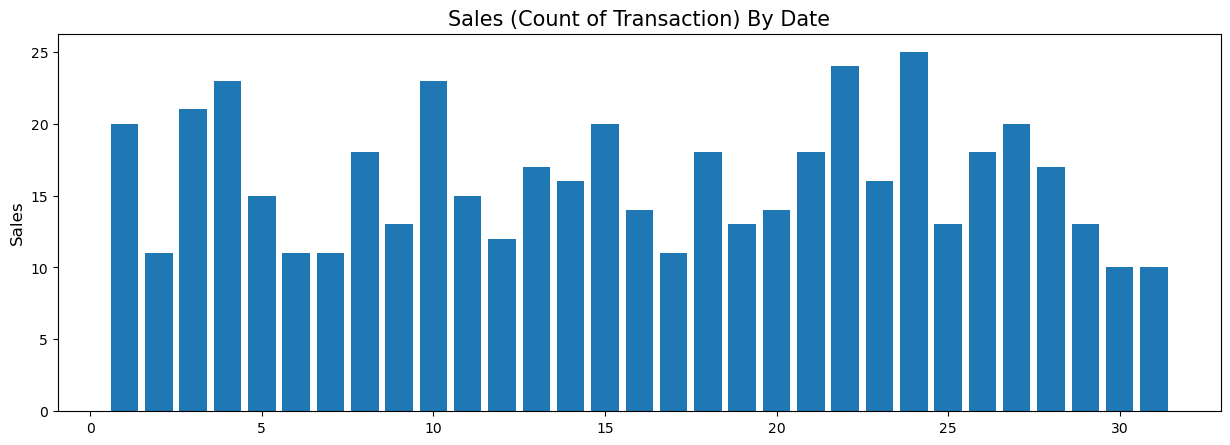

In [64]:
plt.figure(figsize=(15,5),dpi=100)
plt.bar(df_day['Day'],df_day['Sales'])
plt.title("Sales (Count of Transaction) By Date",size = 15)
# plt.xlabel('Item', size=12)
plt.ylabel("Sales",size=12)
plt.show()
# Show Sales By Date

In [65]:
df_dayqty = df.pivot_table(index='Day', values='Quantity', aggfunc='sum').reset_index()
df_dayqty.rename(columns = {'Quantity':'Sales'}, inplace=True)
df_dayqty
## Get Qty Sales By Date 

,Day,Sales
0,1,245
1,2,73
2,3,231
3,4,208
4,5,212
5,6,167
6,7,170
7,8,332
8,9,151
9,10,354


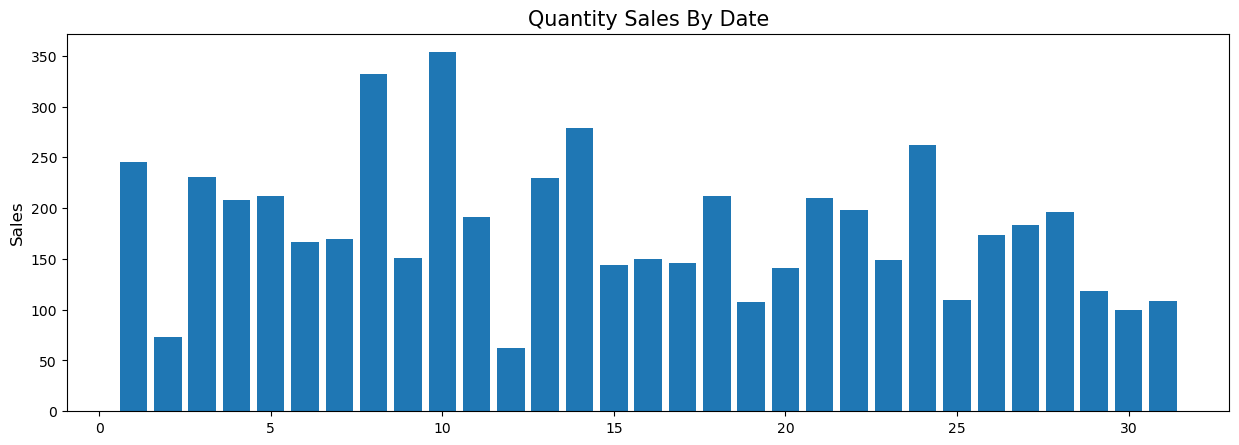

In [66]:
plt.figure(figsize=(15,5),dpi=100)
plt.bar(df_dayqty['Day'],df_dayqty['Sales'])
plt.title("Quantity Sales By Date",size = 15)
# plt.xlabel('Item', size=12)
plt.ylabel("Sales",size=12)
plt.show()
# Show Quantity Sales By Date

- Customer in India tend to buy more on the beginning of the month

In [67]:
df_statesales = df_list_orders.pivot_table(index='State', values='Month', aggfunc='count').sort_values('Month', ascending=False).reset_index()
df_statesales.rename(columns = {'Month':'Sales'}, inplace=True)
df_statesales

,State,Sales
0,Madhya Pradesh,101
1,Maharashtra,90
2,Rajasthan,32
3,Gujarat,27
4,Punjab,25
5,West Bengal,22
6,Delhi,22
7,Uttar Pradesh,22
8,Karnataka,21
9,Kerala,16


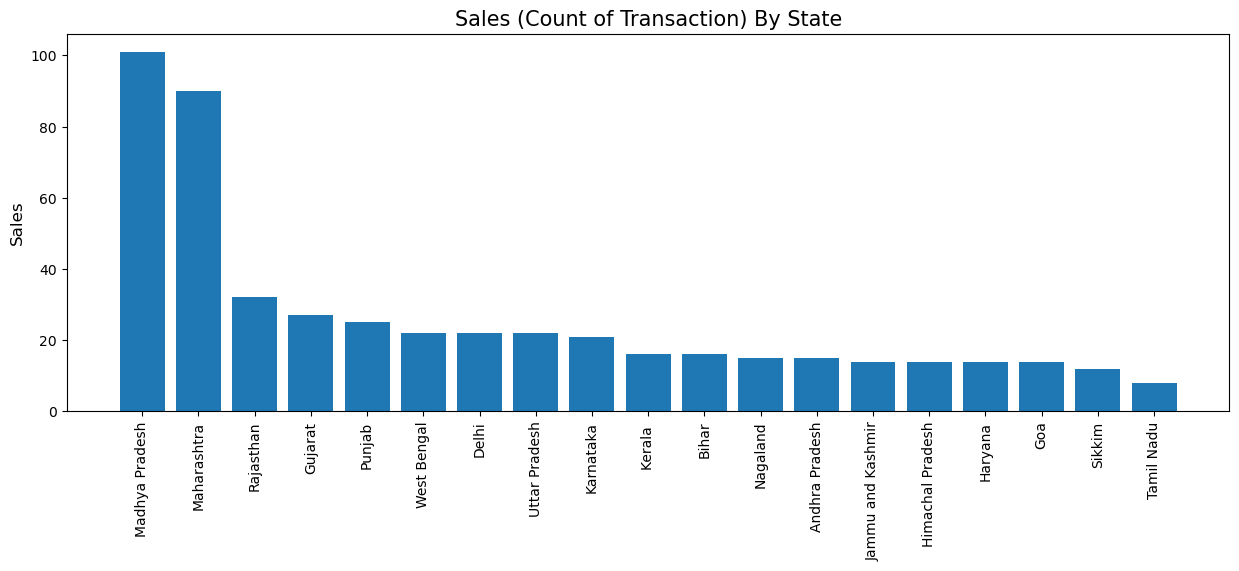

In [68]:
plt.figure(figsize=(15,5),dpi=100)
plt.bar(x=df_statesales['State'], height=df_statesales['Sales'])
plt.title("Sales (Count of Transaction) By State",size = 15)
# plt.xlabel('Item', size=12)
plt.ylabel("Sales",size=12)
plt.xticks(rotation=90)
plt.show()

In [69]:
df_statesalesqty = df.pivot_table(index='State', values='Quantity', aggfunc='sum').sort_values('Quantity', ascending=False).reset_index()
df_statesalesqty.rename(columns = {'Quantity':'Sales'}, inplace=True)
df_statesalesqty

,State,Sales
0,Madhya Pradesh,1360
1,Maharashtra,1056
2,Gujarat,328
3,Uttar Pradesh,288
4,Rajasthan,282
5,Delhi,277
6,West Bengal,216
7,Punjab,216
8,Bihar,206
9,Karnataka,180


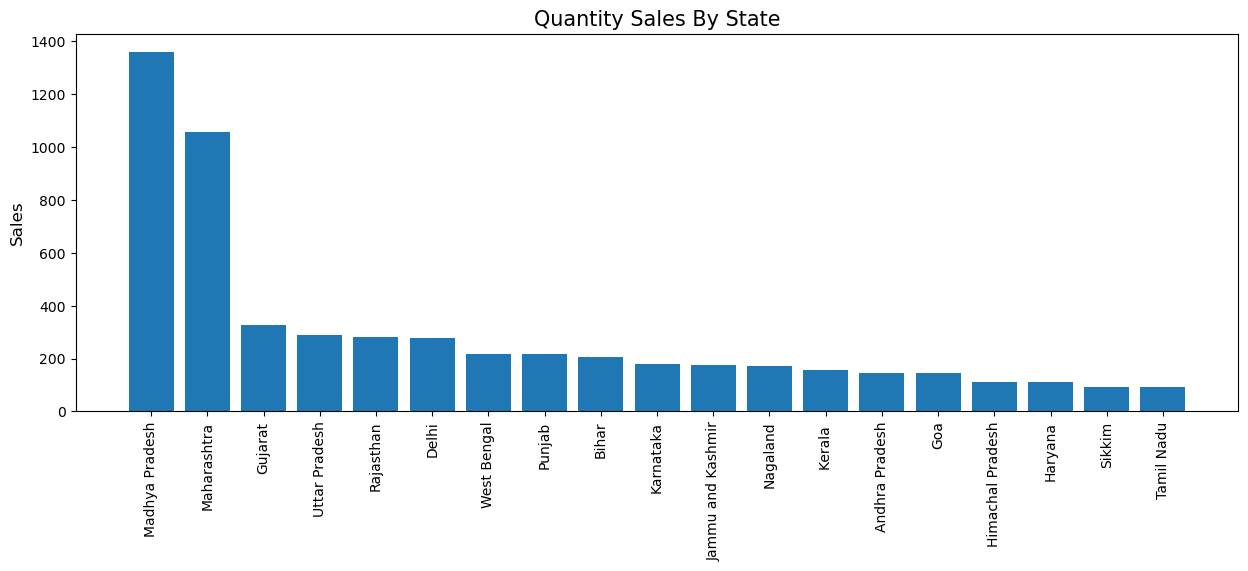

In [70]:
plt.figure(figsize=(15,5),dpi=100)
plt.bar(x=df_statesalesqty['State'], height=df_statesalesqty['Sales'])
plt.title("Quantity Sales By State",size = 15)
# plt.xlabel('Item', size=12)
plt.ylabel("Sales",size=12)
plt.xticks(rotation=90)
plt.show()

#### Quantity Sales By State
- Madhya Pradesh State has the highest both quantity sales and count of transaction sales.
- Tamil Nadu State has the lowest both quantity sales and count of transaction sales.

In [71]:
df_citysales = df_list_orders.pivot_table(index='City', values='State', aggfunc='count').sort_values('State', ascending=False).reset_index()
df_citysales.rename(columns = {'State':'Sales'}, inplace=True)
df_citysales
## Get transaction sales by city

,City,Sales
0,Indore,76
1,Mumbai,68
2,Chandigarh,30
3,Delhi,25
4,Pune,22
5,Bhopal,22
6,Kolkata,22
7,Bangalore,21
8,Jaipur,19
9,Ahmedabad,17


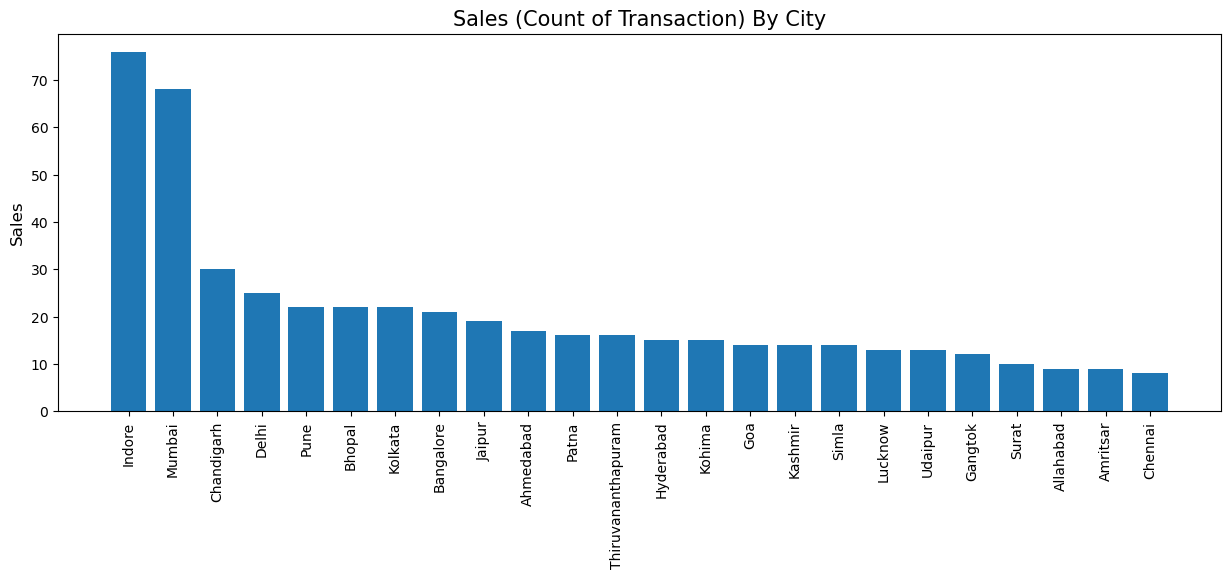

In [72]:
plt.figure(figsize=(15,5),dpi=100)
plt.bar(x=df_citysales['City'], height=df_citysales['Sales'])
plt.title("Sales (Count of Transaction) By City",size = 15)
# plt.xlabel('Item', size=12)
plt.ylabel("Sales",size=12)
plt.xticks(rotation=90)
plt.show()

In [73]:
df_citysalesqty = df.pivot_table(index='City', values='Quantity', aggfunc='sum').sort_values('Quantity', ascending=False).reset_index()
df_citysalesqty.rename(columns = {'Quantity':'Sales'}, inplace=True)
df_citysalesqty
## Get sales by city

,City,Sales
0,Indore,1084
1,Mumbai,727
2,Pune,329
3,Delhi,306
4,Chandigarh,275
5,Bhopal,247
6,Ahmedabad,235
7,Kolkata,216
8,Patna,206
9,Bangalore,180


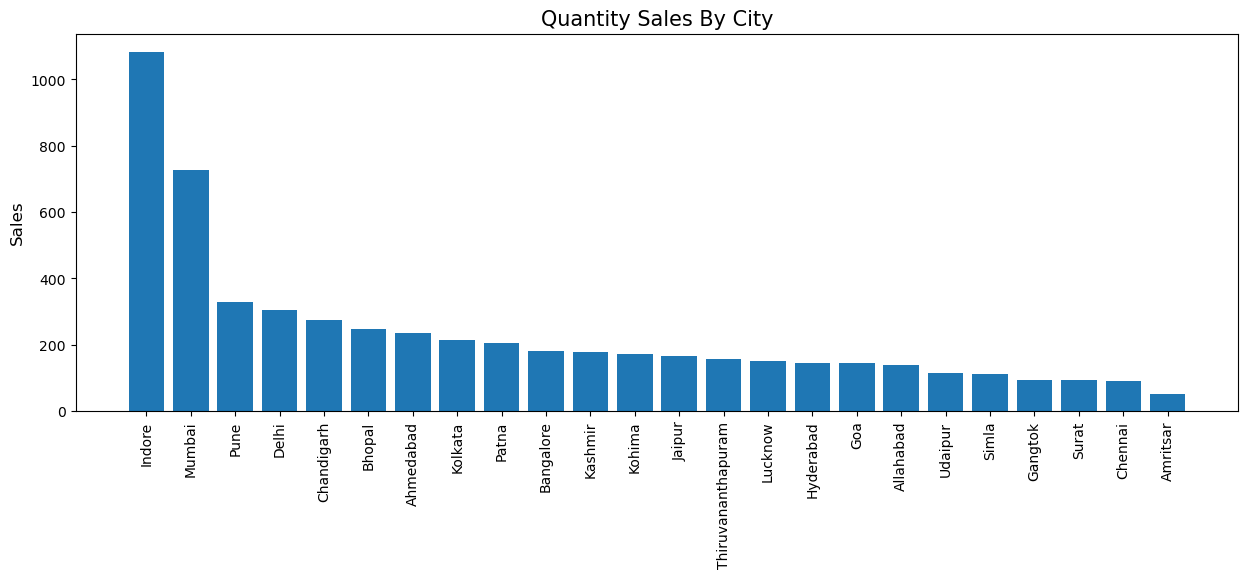

In [74]:
plt.figure(figsize=(15,5),dpi=100)
plt.bar(x=df_citysalesqty['City'], height=df_citysalesqty['Sales'])
plt.title("Quantity Sales By City",size = 15)
# plt.xlabel('Item', size=12)
plt.ylabel("Sales",size=12)
plt.xticks(rotation=90)
plt.show()

#### Quantity Sales By City
- Indore City has the highest both quantity sales and count of transaction sales.
- Amritsar City has the lowest quantity sales
- Chennai City has the lowest count of transaction sales

In [75]:
df.head()

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category,Month,Day,Day Name,YearMonth
0,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases,4,1,Sunday,2018-04
1,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole,4,1,Sunday,2018-04
2,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3,Clothing,Hankerchief,4,1,Sunday,2018-04
3,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4,Electronics,Electronic Games,4,1,Sunday,2018-04
4,B-25602,2018-04-01,Pearl,Maharashtra,Pune,168.0,-111.0,2,Electronics,Phones,4,1,Sunday,2018-04


In [76]:
df_list_orders.head()

,Order ID,Order Date,CustomerName,State,City,Month,Day,Day Name,YearMonth
0,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,4,1,Sunday,2018-04
1,B-25602,2018-04-01,Pearl,Maharashtra,Pune,4,1,Sunday,2018-04
2,B-25603,2018-04-03,Jahan,Madhya Pradesh,Bhopal,4,3,Tuesday,2018-04
3,B-25604,2018-04-03,Divsha,Rajasthan,Jaipur,4,3,Tuesday,2018-04
4,B-25605,2018-04-05,Kasheen,West Bengal,Kolkata,4,5,Thursday,2018-04


In [77]:
df_category = df.pivot_table(index='Category', values='Quantity', aggfunc='count').sort_values('Quantity', ascending=False).reset_index()
df_category.rename(columns = {'Quantity':'Sales'}, inplace=True)
df_category
## Get sales data by product line

,Category,Sales
0,Clothing,949
1,Electronics,308
2,Furniture,243


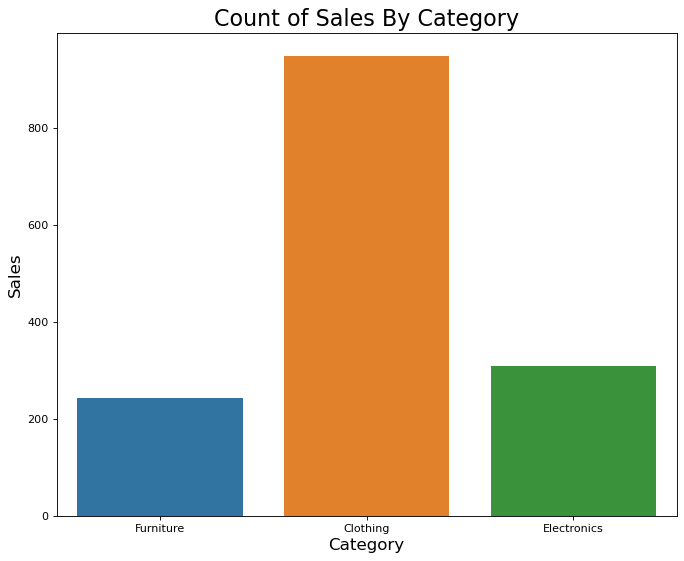

In [118]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['Category'])
plt.title('Count of Sales By Category', size =20)
plt.xlabel("Category",size = 15)
plt.ylabel("Sales", size = 15)
# plt.xticks(rotation=90)
plt.show()
# Show transaction sales by category

In [79]:
df_categoryqty = df.pivot_table(index='Category', values='Quantity', aggfunc='sum').sort_values('Quantity', ascending=False).reset_index()
df_categoryqty.rename(columns = {'Quantity':'Sales'}, inplace=True)
df_categoryqty
## Get sales data by product line

,Category,Sales
0,Clothing,3516
1,Electronics,1154
2,Furniture,945


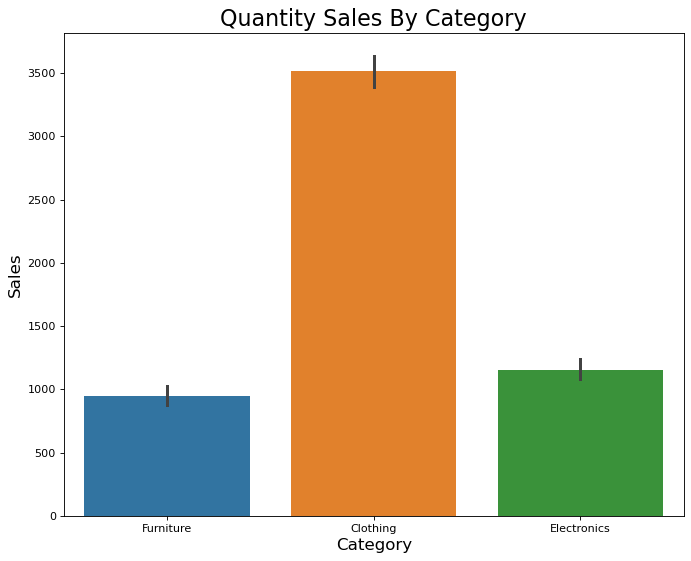

In [80]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x='Category', y='Quantity', data = df, estimator=sum)
plt.title('Quantity Sales By Category', size =20)
plt.xlabel("Category",size = 15)
plt.ylabel("Sales", size = 15)
plt.show()
# Show quantity Sales By Category

##### Sales By Category Product
- Clothing dominates both quantity sales and transactional count sales
- Furniture has the least transcational count sales and quantity sales

In [81]:
df_subcategory = df.pivot_table(index=['Sub-Category', 'Category'], values='Quantity', aggfunc='count').sort_values('Quantity', ascending=False).reset_index()
df_subcategory.rename(columns = {'Quantity':'Sales'}, inplace=True)
df_subcategory
# Get transaction sales by category and sub-category

,Sub-Category,Category,Sales
0,Saree,Clothing,210
1,Hankerchief,Clothing,198
2,Stole,Clothing,192
3,Phones,Electronics,83
4,Electronic Games,Electronics,79
5,Bookcases,Furniture,79
6,T-shirt,Clothing,77
7,Chairs,Furniture,74
8,Printers,Electronics,74
9,Furnishings,Furniture,73


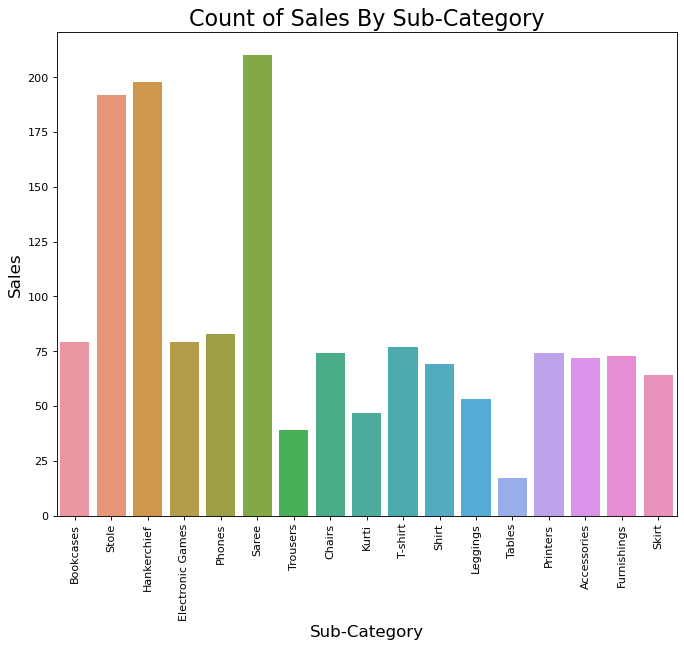

In [82]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['Sub-Category'])
plt.title('Count of Sales By Sub-Category', size =20)
plt.xlabel("Sub-Category",size = 15)
plt.ylabel("Sales", size = 15)
plt.xticks(rotation=90)
plt.show()
## Show number of transaction by sub-category

In [83]:
df_subcategoryqty = df.pivot_table(index=['Sub-Category', 'Category'], values='Quantity', aggfunc='sum').sort_values('Quantity', ascending=False).reset_index()
df_subcategoryqty.rename(columns = {'Quantity':'Sales'}, inplace=True)
df_subcategoryqty
## Get Quantity Sales By Sub-Category and Category

,Sub-Category,Category,Sales
0,Saree,Clothing,782
1,Hankerchief,Clothing,754
2,Stole,Clothing,671
3,Furnishings,Furniture,310
4,T-shirt,Clothing,305
5,Phones,Electronics,304
6,Electronic Games,Electronics,297
7,Bookcases,Furniture,297
8,Printers,Electronics,291
9,Chairs,Furniture,277


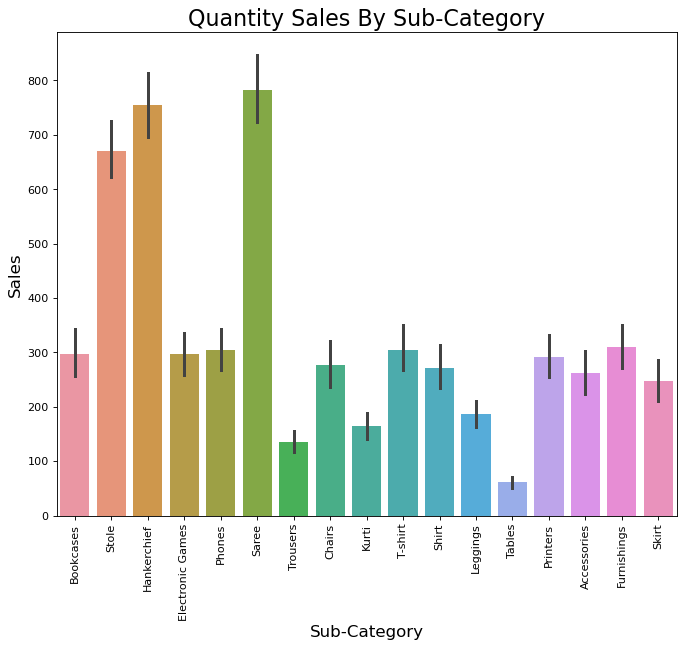

In [84]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x='Sub-Category', y='Quantity', data = df, estimator=sum)
plt.title('Quantity Sales By Sub-Category', size =20)
plt.xlabel("Sub-Category",size = 15)
plt.ylabel("Sales", size = 15)
plt.xticks(rotation=90)
plt.show()
# Show Quantity Sales By Sub-Category

In [85]:
df_subcategoryavg = df.pivot_table(index=['Sub-Category', 'Category'], values='Quantity', aggfunc='mean').sort_values('Quantity', ascending=False).reset_index()
df_subcategoryavg.rename(columns = {'Quantity':'Sales'}, inplace=True)
df_subcategoryavg
## Get Average Quantity/Transaction Each Sub-Category and Category

,Sub-Category,Category,Sales
0,Furnishings,Furniture,4.246575
1,T-shirt,Clothing,3.961039
2,Printers,Electronics,3.932432
3,Shirt,Clothing,3.927536
4,Skirt,Clothing,3.875000
5,Hankerchief,Clothing,3.808081
6,Electronic Games,Electronics,3.759494
7,Bookcases,Furniture,3.759494
8,Chairs,Furniture,3.743243
9,Saree,Clothing,3.723810


#### Quantity Sales By Subcategory 
- Saree, Hankerchief, Stole have the most sales in quantity and count of transaction, yet not in a good rank position for average item sold/transaction (Hankerchief 5th position, Saree 9th postion, Stole 14th position)
- Furnishing has the most average item sold/transaction yet number of transaction only sat in 9th rank

### MULTIVARIATE ANALYSIS

#### Sales VS Target

In [86]:
## Import DF Target
df_target = pd.read_csv('Sales target.csv')

In [87]:
df_target['Month of Order Date'] = pd.to_datetime(df_target['Month of Order Date'], format='%b-%y')
df_target['Month of Order Date'] = pd.to_datetime(df_target['Month of Order Date']).dt.to_period('M')
## Set Month of Order Date Type of Data into DateTime

In [88]:
df_target = df_target.sort_values(['Category','Month of Order Date'], ascending=[True, True])
# df_target.drop(columns=['Index'])
## Sorting df_target

In [89]:
df_achievement = df.pivot_table(index=['YearMonth', 'Category'], values='Amount', aggfunc='sum').sort_values(['Category','YearMonth'], ascending=[True, True]).reset_index()
df_achievement.rename(columns = {'YearMonth':'Month of Order Date', 'Amount':'Achievement'}, inplace=True)
## Get Amount Achievement By Category and By Month of Order Date

In [90]:
df_tgtvsach = df_target
df_tgtvsach['Achievement'] = df_achievement['Achievement']
df_tgtvsach['Vs Target(%)'] = (df_tgtvsach['Achievement']/df_tgtvsach['Target'])*100
df_tgtvsach

,Month of Order Date,Category,Target,Achievement,Vs Target(%)
12,2018-04,Clothing,12000.0,11127.0,92.725000
13,2018-05,Clothing,12000.0,12807.0,106.725000
14,2018-06,Clothing,12000.0,9344.0,77.866667
15,2018-07,Clothing,14000.0,6502.0,46.442857
16,2018-08,Clothing,14000.0,9539.0,68.135714
17,2018-09,Clothing,14000.0,7207.0,51.478571
18,2018-10,Clothing,16000.0,13361.0,83.506250
19,2018-11,Clothing,16000.0,16651.0,104.068750
20,2018-12,Clothing,16000.0,18560.0,116.000000
21,2019-01,Clothing,16000.0,26716.0,166.975000


In [91]:
df.head()

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category,Month,Day,Day Name,YearMonth
0,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases,4,1,Sunday,2018-04
1,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole,4,1,Sunday,2018-04
2,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3,Clothing,Hankerchief,4,1,Sunday,2018-04
3,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4,Electronics,Electronic Games,4,1,Sunday,2018-04
4,B-25602,2018-04-01,Pearl,Maharashtra,Pune,168.0,-111.0,2,Electronics,Phones,4,1,Sunday,2018-04


In [92]:
df_statecategory = df.pivot_table(index=['Day Name','Category'], values='Quantity', aggfunc='count')
df_statecategory.rename(columns = {'Quantity':'Sales'}, inplace=True)
df_statecategory

Sales
Day Name  Category          
Monday    Clothing       158
          Electronics     50
          Furniture       33
Tuesday   Clothing       145
          Electronics     41
          Furniture       27
Wednesday Clothing        90
          Electronics     21
          Furniture       27
Thursday  Clothing       151
          Electronics     48
          Furniture       43
Friday    Clothing       157
          Electronics     50
          Furniture       35
Saturday  Clothing        96
          Electronics     33
          Furniture       31
Sunday    Clothing       152
          Electronics     65
          Furniture       47

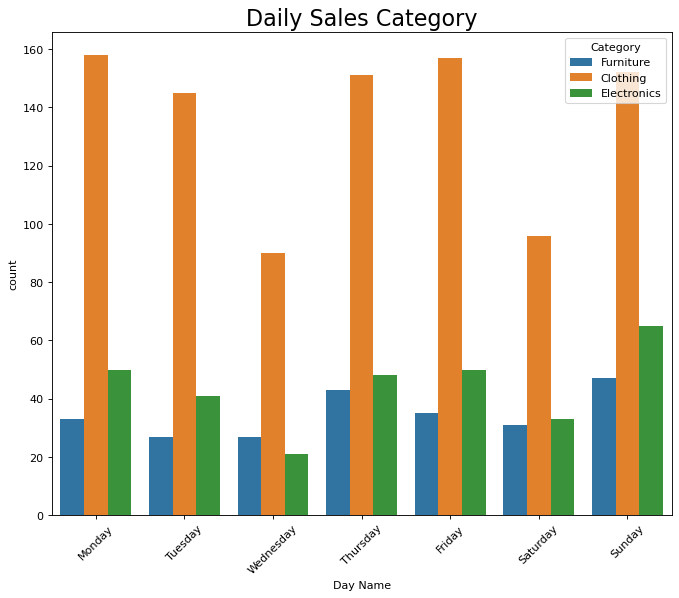

In [93]:
plt.figure(figsize=(10, 8), dpi = 80)
plt.title('Daily Sales Category', size=20)
sns.countplot(df['Day Name'], hue = df['Category'])
plt.xticks(rotation=45)
plt.show()

### Daily Sales By Category
- Daily Sales (Count of Transaction) is dominated by Clothing Category 
- Furniture category places second rank of sales in Wednesday, other than that, places in last position

In [94]:
df_statecategory = df.pivot_table(index=['State','Category'], values='Quantity', aggfunc='count').reset_index()
df_statecategory.rename(columns = {'Quantity':'Sales'}, inplace=True)
df_statecategory

,State,Category,Sales
0,Andhra Pradesh,Clothing,25
1,Andhra Pradesh,Electronics,11
2,Andhra Pradesh,Furniture,6
3,Bihar,Clothing,37
4,Bihar,Electronics,18
5,Bihar,Furniture,7
6,Delhi,Clothing,45
7,Delhi,Electronics,12
8,Delhi,Furniture,17
9,Goa,Clothing,34


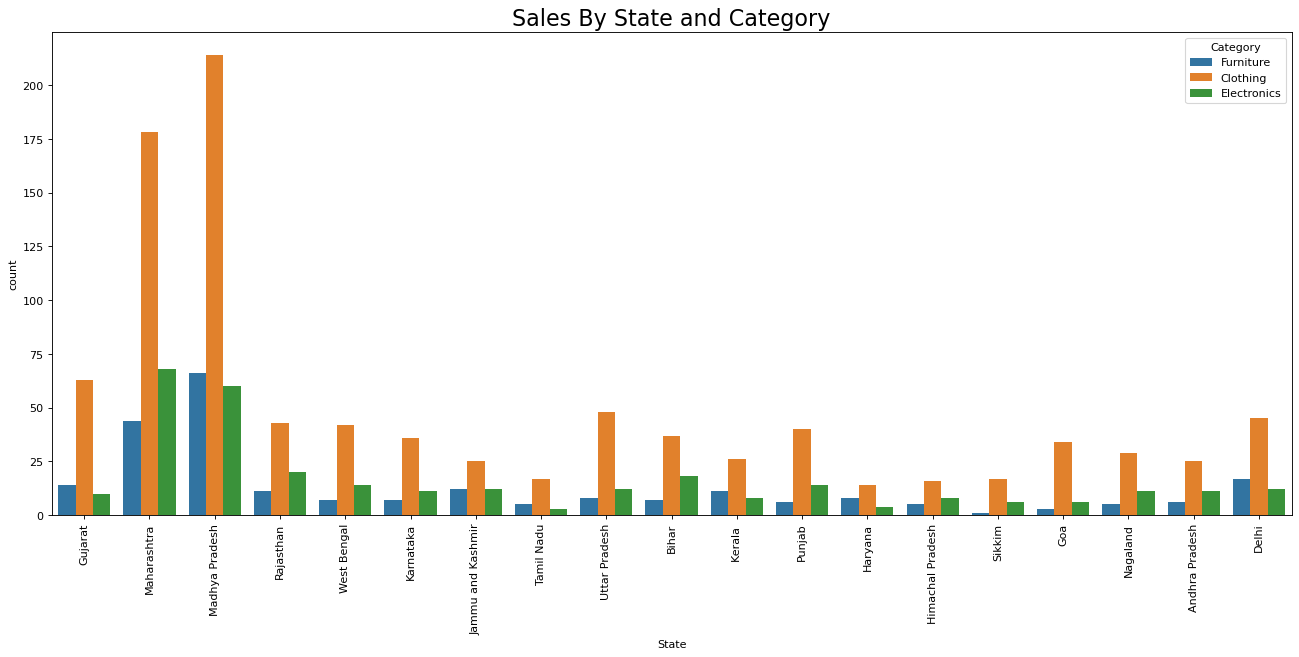

In [95]:
plt.figure(figsize=(20, 8), dpi = 80)
plt.title('Sales By State and Category', size=20)
sns.countplot(df['State'], hue = df['Category'])
plt.xticks(rotation=90)
plt.show()

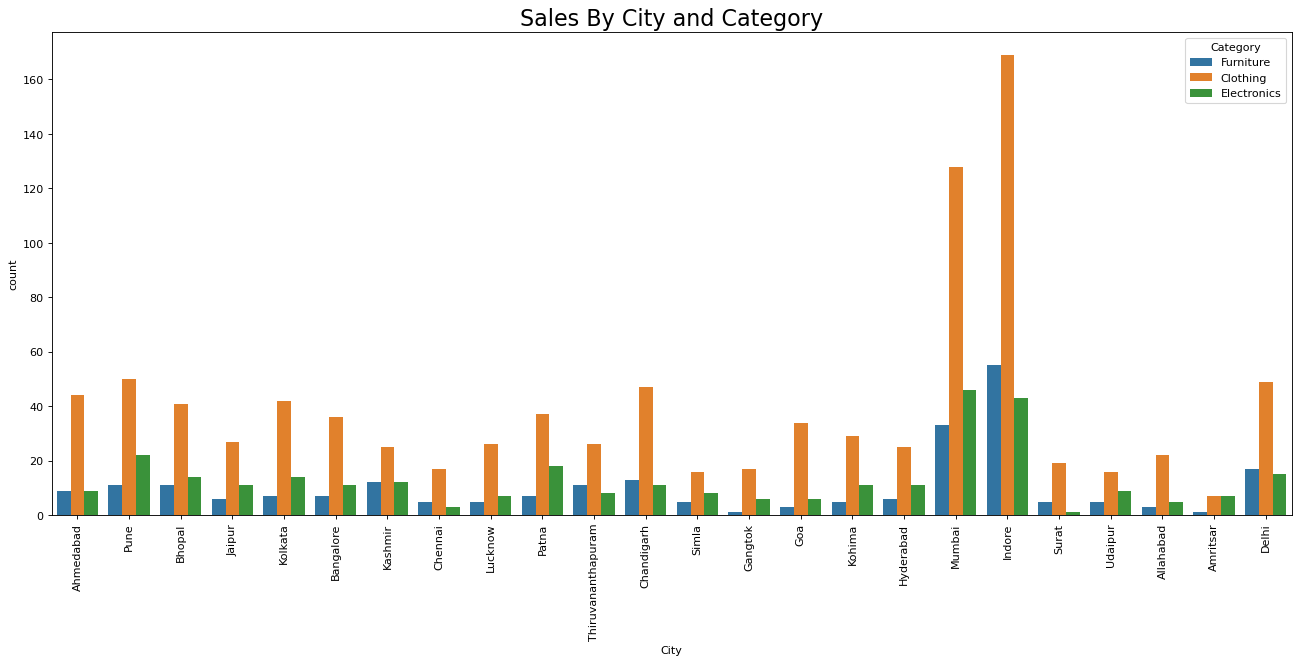

In [96]:
plt.figure(figsize=(20, 8), dpi = 80)
plt.title('Sales By City and Category', size=20)
sns.countplot(df['City'], hue = df['Category'])
plt.xticks(rotation=90)
plt.show()

- Clothing dominates sales in all over City & State

# DATA INSIGHT

- Sales Transaction quite stabil between May - Sept 2018 and start to increasing after Sept 2018
- Peak sales transaction is occured on January 2019
- Negative profits occured during first 6 months (Apr-Sept 2018) --> Due to promotion 
- Profits are start turn into positve by October 2018 onward
- Most transaction occured on Monday 
- Least transaction occured on Wednesday
- Customer in India tend to buy more on the beginning of the month
- Madhya Pradesh State has the highest both quantity sales and count of transaction sales.
- Tamil Nadu State has the lowest both quantity sales and count of transaction sales.
- Indore City has the highest both quantity sales and count of transaction sales.
- Amritsar City has the lowest quantity sales
- Chennai City has the lowest count of transaction sales
- Clothing dominates both quantity sales and transactional count sales
- Furniture has the least transcational count sales and quantity sales
- Saree, Hankerchief, Stole have the most sales in quantity and count of transaction, yet not in a good rank position for average item sold/transaction (Hankerchief 5th position, Saree 9th postion, Stole 14th position)
- Furnishing has the most average item sold/transaction yet number of transaction only sat in 9th rank
- Daily Sales (Count of Transaction) is dominated by Clothing Category 
- Furniture category places second rank of sales in Wednesday, other than that, places in last position
- Clothing dominates sales in all over City & State

# SUMMARY & RECOMMENDATION

- Create promotion every Monday & Wednesday on the beginning of the month (Date 1-10)
- Create Marketing promotion in Amritsar City to increase quantity/item sales item 
- Create Marketing promotion in Chennai City to increase  number of transaction sales
- Create discount promotion on Clothing to incritease quantity/item sales item 
- Create Marketing to boost Electronic & Furniture sales

# BUSINESS IMPACT SIMULATION

In [97]:
df.head()

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category,Month,Day,Day Name,YearMonth
0,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases,4,1,Sunday,2018-04
1,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole,4,1,Sunday,2018-04
2,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3,Clothing,Hankerchief,4,1,Sunday,2018-04
3,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4,Electronics,Electronic Games,4,1,Sunday,2018-04
4,B-25602,2018-04-01,Pearl,Maharashtra,Pune,168.0,-111.0,2,Electronics,Phones,4,1,Sunday,2018-04


#### Before

In [98]:
df_before = df.pivot_table(index='Day', values='Quantity', aggfunc='sum').reset_index()
df_before.rename(columns = {'Quantity':'Sales'}, inplace=True)
df_before

,Day,Sales
0,1,245
1,2,73
2,3,231
3,4,208
4,5,212
5,6,167
6,7,170
7,8,332
8,9,151
9,10,354


In [114]:
Before = sum(df_before['Sales'])
Before

5615

#### After

In [100]:
df_after = df.pivot_table(index='Day', values='Quantity', aggfunc='sum').reset_index()
df_after.rename(columns = {'Quantity':'Sales'}, inplace=True)
df_after

,Day,Sales
0,1,245
1,2,73
2,3,231
3,4,208
4,5,212
5,6,167
6,7,170
7,8,332
8,9,151
9,10,354


In [112]:
A = sum(df_after[df_after['Day'] >10]['Sales'] )

In [109]:
B = 354 * 10

In [111]:
Result = A + B
Result

7012.0

#### Impact

In [117]:
Impact = (Result/Before)*100
Impact

124.87978628673197

# Impact : 25% Increament of Sales!!